In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("reviews.csv")

In [3]:
df.head()

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
0,Mass Effect Legendary Edition Part 3: Mass Ef...,BioWare,Electronic Arts,2021-05-14,"Xbox One, PlayStation 4, PC","Compilation, RPG",8,Dan Stapleton
1,Call of Duty: Vanguard - Single-Player Campaign,"Treyarch, Sledgehammer Games",Activision,2021-11-05,"Xbox Series X|S, Xbox One, PlayStation 5, P...","Shooter, First-Person",7,Simon Cardy
2,Shin Megami Tensei V,Atlus,Atlus,2021-11-12,Nintendo Switch,RPG,8,Leana Hafer
3,Forza Horizon 5,Playground Games,Xbox Game Studios,2021-11-09,"PC, Xbox Series X|S, Xbox One",Racing,10,Luke Reilly
4,Riders Republic,Ubisoft Annecy,Ubisoft,2021-10-28,"Stadia, PlayStation 5, PlayStation 4, Xbox ...","Sports, Extreme Sports",8,Travis Northup


- In this small dataset, we will first look at the overall scores of developers and publishers.
- Next, we'll look at the average ratings given by the reviewers.
- Finally, we will draw a time series according to the release dates of the games and look at the score trend.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         236 non-null    object
 1   developers    205 non-null    object
 2   publishers    232 non-null    object
 3   release_date  221 non-null    object
 4   platforms     234 non-null    object
 5   genres        235 non-null    object
 6   score         236 non-null    int64 
 7   reviewed_by   236 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.9+ KB


First, we look at the number of publishers in the dataset. Since the numbers are small, only the first 5 publisher information will be used.

In [5]:
df["publishers"].value_counts()

Electronic Arts                   13
Square Enix                       10
Nintendo                          10
Ubisoft                            7
Sony Interactive Entertainment     6
                                  ..
NetEase , 24 Entertainment         1
Marvelous Entertainment            1
1C Entertainment                   1
Pandasaurus                        1
Young Horses, Inc.                 1
Name: publishers, Length: 136, dtype: int64

Average of publishers by scores:

Pie chart for the publishers:

Then the same will be done for the developer information. Since the numbers are small, only the first 3 developers information will be used.

In [9]:
df["developers"].value_counts()

Capcom                               4
BioWare                              3
EA Canada                            3
Raven Software,  Treyarch            3
Milestone                            3
                                    ..
Dang!                                1
The Pokemon Company,  Timi Studio    1
Fallen Flag Studio                   1
Neon Giant                           1
Young Horses,  Inc.                  1
Name: developers, Length: 182, dtype: int64

In [10]:
capcom_mean = df[df["developers"] == "Capcom"]["score"].mean()
bio_mean = df[df["developers"] == "BioWare"]["score"].mean()
ea_mean = df[df["developers"] == "EA Canada"]["score"].mean()

print(f"Average scores of games developed by Capcom: {capcom_mean}")
print(f"Average scores of games developed by BioWare: {bio_mean}")
print(f"Average scores of games developed by EA Canada: {ea_mean}")

Average scores of games developed by Capcom: 8.0
Average scores of games developed by BioWare: 8.333333333333334
Average scores of games developed by EA Canada: 6.666666666666667


([<matplotlib.patches.Wedge at 0x244230a85e0>,
 [Text(0.5060714301826006, 0.9766737979248432, 'Capcom'),
  Text(-1.0818078244886113, -0.19922808756603094, 'BioWare'),
  Text(0.6745936952959793, -0.8688632494627193, 'EA Canada')],
 [Text(0.2760389619177821, 0.5327311625044598, '34.78%'),
  Text(-0.5900769951756061, -0.10866986594510779, '36.23%'),
  Text(0.3679601974341705, -0.47392540879784684, '28.99%')])

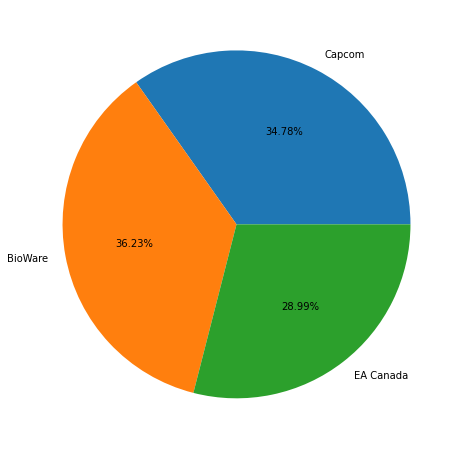

In [11]:
dev_score_means = [capcom_mean, bio_mean, ea_mean]
labels = ["Capcom", "BioWare", "EA Canada"]

plt.figure(figsize=(12,8))
plt.pie(dev_score_means, labels = labels, autopct='%.2f%%')

A similar process will be carried out in order to examine the scoring behavior of the reviewers.

In [12]:
df["reviewed_by"].value_counts().head(10)

Tristan Ogilvie      17
Leana Hafer          16
Luke Reilly          16
Travis Northup       16
Mitchell Saltzman    15
Tom Marks            12
Gabriel Moss         12
Matt Thrower         11
Simon Cardy          11
Jarrett Green         7
Name: reviewed_by, dtype: int64

In [13]:
review_1 = df[df["reviewed_by"] == "Tristan Ogilvie"]["score"].mean()
review_2 = df[df["reviewed_by"] == "Leana Hafer"]["score"].mean()
review_3 = df[df["reviewed_by"] == "Luke Reilly"]["score"].mean()
review_4 = df[df["reviewed_by"] == "Travis Northup"]["score"].mean()
review_5 = df[df["reviewed_by"] == "Mitchell Saltzman"]["score"].mean()

print(f"Average scores of games reviewed by Tristan Ogilvie: {review_1}")
print(f"Average scores of games reviewed by Leana Hafer: {review_2}")
print(f"Average scores of games reviewed by Luke Reilly: {review_3}")
print(f"Average scores of games reviewed by Travis Northup: {review_4}")
print(f"Average scores of games reviewed by Mitchell Saltzman: {review_5}")

Average scores of games reviewed by Tristan Ogilvie: 6.9411764705882355
Average scores of games reviewed by Leana Hafer: 7.5
Average scores of games reviewed by Luke Reilly: 7.0625
Average scores of games reviewed by Travis Northup: 6.9375
Average scores of games reviewed by Mitchell Saltzman: 7.933333333333334


- Finally, a time series will be created according to the release dates of the games.
- The first release date we have is 2004-11-22 and the last release date is 2021-11-12.
- This will give us the scoring behavior over the last 17 years.

In [14]:
df["release_date"].unique()

array(['2021-05-14', '2021-11-05', '2021-11-12', '2021-11-09',
       '2021-10-28', '2021-11-03', '2021-10-26', nan, '2021-08-19',
       '2021-10-21', '2021-10-19', '2021-10-29', '2021-09-15',
       '2021-10-14', '2021-10-22', '2021-05-18', '2021-10-20',
       '2021-10-15', '2021-10-12', '2017-01-31', '2021-10-05',
       '2021-10-08', '2021-10-07', '2021-09-30', '2021-10-09',
       '2021-09-23', '2021-10-04', '2021-09-02', '2021-08-27',
       '2019-05-28', '2021-09-29', '2021-09-11', '2019-11-07',
       '2021-09-21', '2021-09-16', '2021-09-17', '2021-09-10',
       '2021-09-14', '2021-08-26', '2021-09-03', '2021-08-31',
       '2021-09-09', '2021-06-16', '2021-08-24', '2021-09-07',
       '2020-05-22', '2021-08-11', '2021-08-25', '2021-08-20',
       '2020-07-17', '2021-08-05', '2021-04-22', '2021-08-16',
       '2021-08-12', '2020-01-01', '2021-08-02', '2021-07-27',
       '2020-09-30', '2021-07-08', '2021-07-21', '2021-07-29',
       '2020-11-10', '2021-07-28', '2021-07-26', '

In [15]:
release_date_grouping = df.groupby("release_date").mean()
release_date_grouping[["score"]]

,score
release_date,
2004-11-22,8.0
2015-06-09,7.0
2016-06-14,9.0
2016-09-25,7.0
2017-01-31,7.0
...,...
2021-10-29,8.0
2021-11-03,7.0
2021-11-05,7.0


<AxesSubplot:xlabel='release_date'>

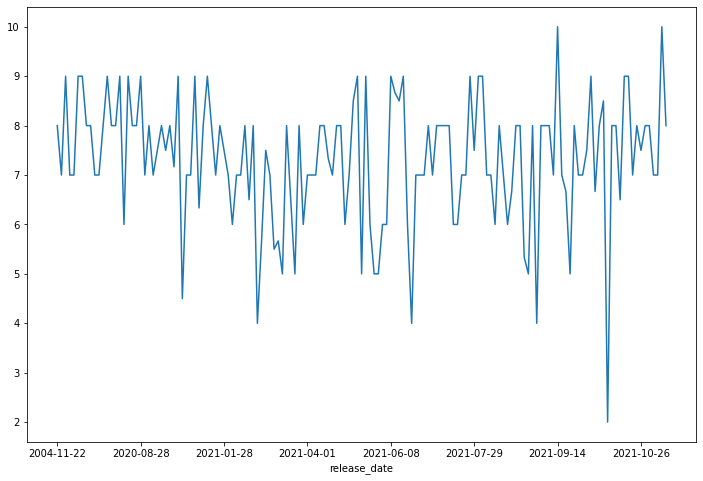

In [16]:
plt.figure(figsize=(12,8))
release_date_grouping["score"].plot(x=df.release_date)

- While there have been ups and downs, the scoring range seems to be stuck between 7-9.